In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('E:/IT Engg/5th sem/ML/Admission_Predict.csv')
print(df.head(5))

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
df = df.drop(['Serial No.'], axis=1)
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


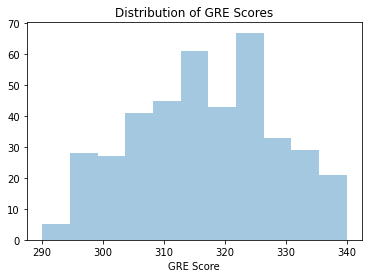

In [4]:
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

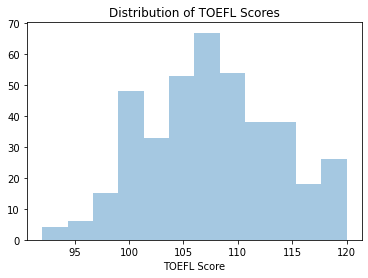

In [5]:
fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

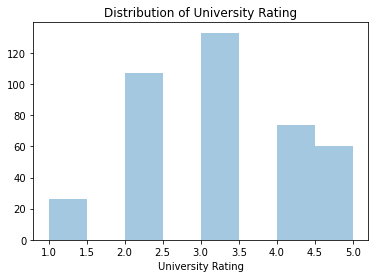

In [6]:
fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

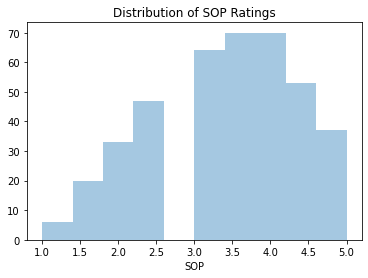

In [7]:
fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

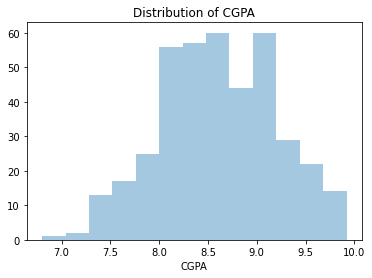

In [8]:
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

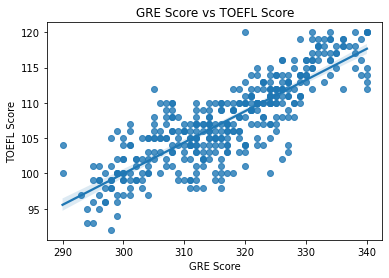

In [9]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

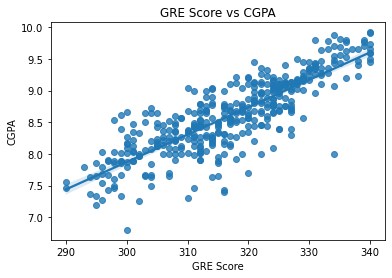

In [10]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

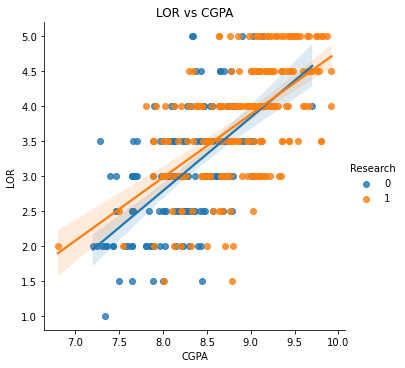

In [11]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("LOR vs CGPA")
plt.show()

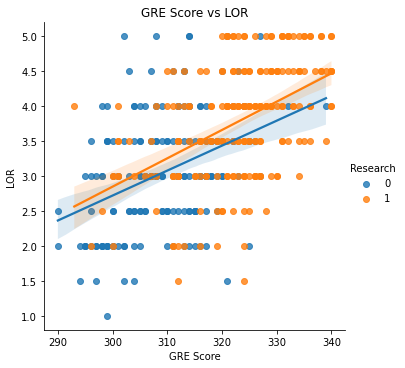

In [12]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

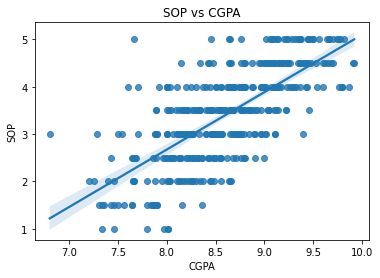

In [13]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("SOP vs CGPA")
plt.show()

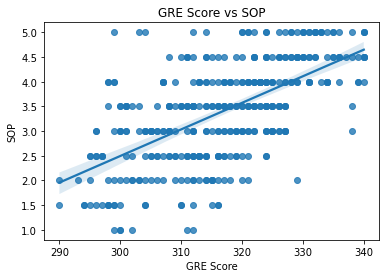

In [14]:
fig = sns.regplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()

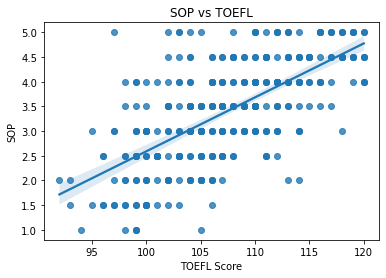

In [15]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("SOP vs TOEFL")
plt.show()

In [16]:
corr = df.corr()
print(corr)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

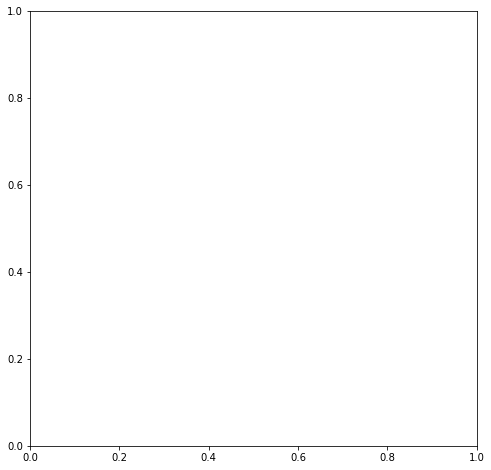

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

In [18]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

In [19]:
dropSelf = np.zeros_like(corr)

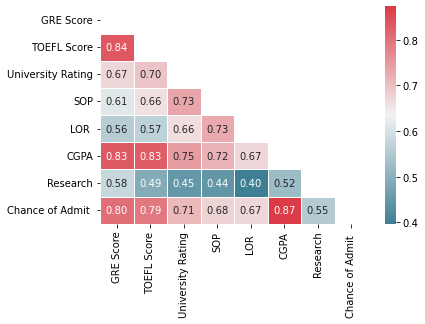

In [24]:
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop(['Chance of Admit '], axis=1) 
y = df['Chance of Admit ']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
315,308,104,2,2.5,3.0,8.07,0
316,298,101,2,1.5,2.0,7.86,0
317,300,99,1,1.0,2.5,8.01,0
318,324,111,3,2.5,2.0,8.80,1


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
models = [['DecisionTree :',DecisionTreeRegressor()],
['Linear Regression :', LinearRegression()], ['SVM :', SVR()]]
print("Results...")

Results...


In [35]:
for name,model in models:model= model

In [36]:
model.fit(X_train, y_train)

SVR()

In [41]:
predictions = model.predict(X_test)

In [42]:
print(name, (np.sqrt(mean_squared_error(y_test, predictions)))) 
classifier = RandomForestRegressor()
classifier.fit(X,y)

SVM : 0.08180727044650482


RandomForestRegressor()

In [44]:
feature_names = X.columns 
print(feature_names)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')


In [45]:
importance_frame = pd.DataFrame()

In [46]:
importance_frame['Features'] = X.columns

In [47]:
importance_frame['Importance'] = classifier.feature_importances_

In [48]:
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

<BarContainer object of 7 artists>

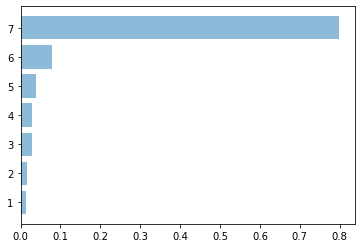

In [49]:
plt.barh([1,2,3,4,5,6,7],
importance_frame['Importance'],
align='center', alpha=0.5)